Полином Лагранжа для интерполяции

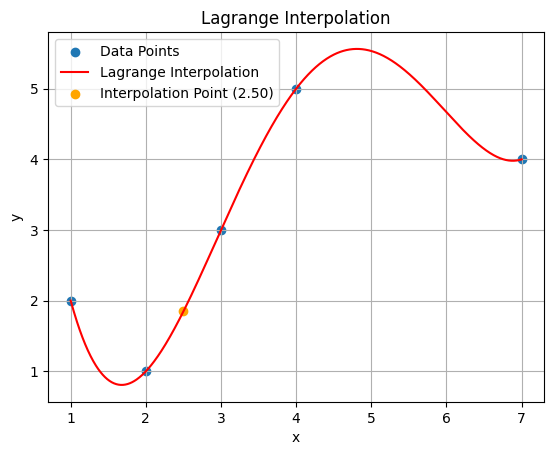

Значение интерполяции в точке 2.5 = 1.8484375000000002


In [3]:
import numpy as np
import matplotlib.pyplot as plt

def lagrange_interpolation(xp, x_values, y_values):
    n = len(x_values) # Количество точек данных
    yp = 0 # Инициализация переменной для хранения результата интерполяции в точке xp

    for i in range(n): # Внешний цикл по точкам данных
        p = 1 # Инициализация множителя Лагранжа (бпзсный полином для текущей точки??)
        for j in range(n): # Внутренний цикл для вычисления множителей Лагранжа
            if i != j: # Исключаем текущую точку при вычислении множителя
                p = p * (xp - x_values[j]) / (x_values[i] - x_values[j]) # Рассчитываем множитель Лагранжа
        yp = yp + p * y_values[i] # Добавляем вклад от текущей точки к результату

    return yp # Возвращаем результат интерполяции в точке xp

def plot_lagrange_interpolation(x_values, y_values):
    # Generate points for smooth curve
    x_smooth = np.linspace(min(x_values), max(x_values), 1000)
    y_smooth = [lagrange_interpolation(x, x_values, y_values) for x in x_smooth]

    # Plot original points and Lagrange interpolation
    plt.scatter(x_values, y_values, label='Data Points')
    plt.plot(x_smooth, y_smooth, label='Lagrange Interpolation', color='red')
    
    # Highlight the interpolation point
    plt.scatter(interpolation_point, lagrange_interpolation(interpolation_point, x_values, y_values),
                color='orange', marker='o', label=f'Interpolation Point ({interpolation_point:.2f})')

    # Customize plot
    plt.title('Lagrange Interpolation')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.show()

# Данные и точка интерполяции
x_values = [1, 2, 3, 4, 7]
y_values = [2, 1, 3, 5, 4]
interpolation_point = 2.5

# Рисуем график интерполяции
plot_lagrange_interpolation(x_values, y_values)

answer = lagrange_interpolation(interpolation_point, x_values, y_values)
print("Значение интерполяции в точке", interpolation_point, "=", answer)

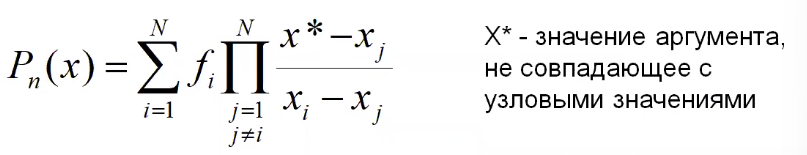



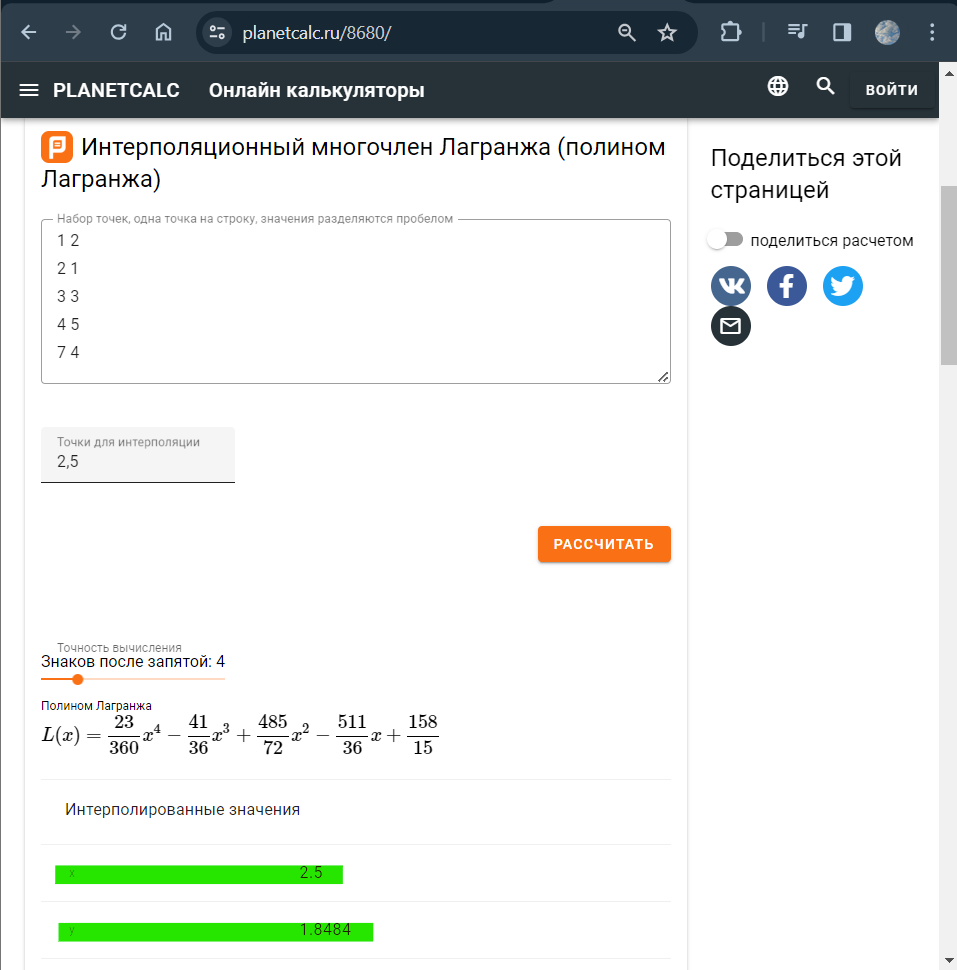

<h3>КУБИЧЕСКИЙ СПЛАЙН</H3>

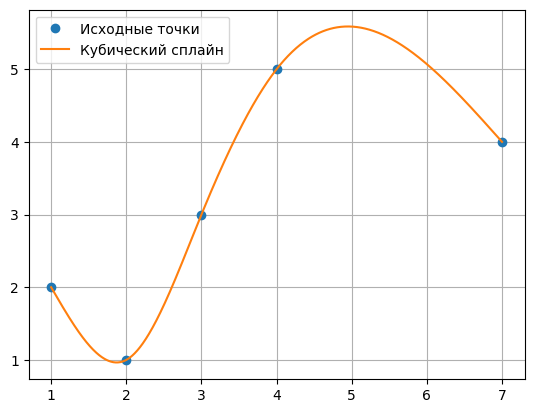

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def cubic(x, y):
    n = len(x) #кол-во точек в массиве
    
    # для дальнейшего вычисление коэф куб полинома: 
    h = np.diff(x) # шаги между точками данных в массиве х, для определения ширины каждого интервала, на котором будет строиться кубический сплайн
    alpha = np.diff(y) / h  # отношение разницы между значениями в массиве y к шагам h, будет использован для вычисления промежуточных значений коэффициентов в последующих этапах
    beta = np.zeros(n) # массив нулей для промежуточных результатов коэффициентов
    
    # вычисляем бета, используется для хранения промежуточных значений, которые впоследствии используются при вычислении коэффициентов C на каждом интервале
    for i in range(1, n-1): 
        beta[i] = 3 * (alpha[i] - alpha[i-1])

        # массивы для хранения коэф куб сплайна после решения системы уравнений
    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)

    # массивы для решения слау для определения коэф куб сплайна
    l = np.zeros(n) # для хранения элементов диагонали матрицы, используемой при решении системы уравнений
    mu = np.zeros(n) # хранит элементы, связанные с верхней диагональю матрицы
    z = np.zeros(n) # для хранения результатов, полученных при прямой подстановке в процессе решения системы уравнений
    
    # первый элемент, для дальнейшего решения системы линейных уравнений методом трехдиагональной матрицы
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    # решение слау методом прогонки для определения коэф куб полинома
    for i in range(1, n-1):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (beta[i] - h[i-1] * z[i-1]) / l[i]

    # последний элемент
    l[n-1] = 1
    z[n-1] = 0
    c[n-1] = 0
    
    # решает систему линейных уравнений методом обратной подстановки и вычисляет коэф для куб сплайна
    # обратная подстановка для вычисления коэффициентов b, c, и d
    for j in range(n-2, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
    # для вычисления значений кубического сплайна в произвольной точке t
    # возвращение функции для интерполяции
    def spline(t):
        # нахождения индекса точки данных, ближайшей к t в массиве x. 
        # Это необходимо для определения интервала, в пределах которого будет происходить интерполяция
        index = np.searchsorted(x, t)
        if index == 0:
            index = 1
        elif index == n:
            index = n - 1
        t_hat = t - x[index-1] # расстояние между t и ближайшей точкой x
        result = y[index-1] + b[index-1]*t_hat + c[index-1]*t_hat**2 + d[index-1]*t_hat**3
        return result
    
    # функция возвращает вычисленное значение сплайна в точке t
    return spline

# Пример использования
x_data = np.array([1, 2, 3, 4, 7])
y_data = np.array([2, 1, 3, 5, 4])

spline_func = cubic(x_data, y_data) # создаем куб сплайн

# Генерация значений для построения графика
x_interp = np.linspace(min(x_data), max(x_data), 1000) # генерируем точки на оси Х
y_interp = [spline_func(t) for t in x_interp] # вычисляем значения куб сплайна для постоения графика

# Построение графика
plt.plot(x_data, y_data, 'o', label='Исходные точки')
plt.plot(x_interp, y_interp, label='Кубический сплайн')
plt.legend()
plt.grid(True)
plt.show()


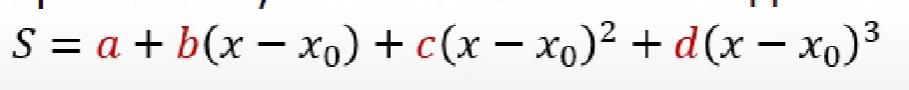
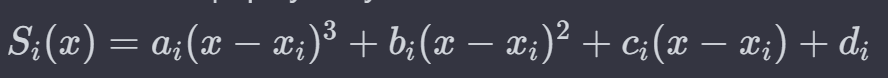

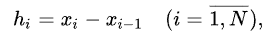

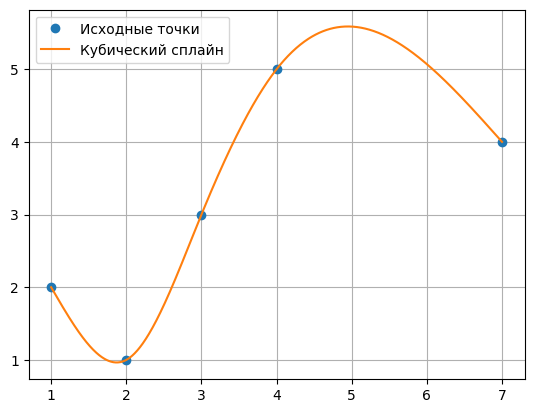

Для точки x=2.5, ожидаемое значение y=2.5, полученное значение y=1.7543103448275863
Для точки x=5.5, ожидаемое значение y=5.5, полученное значение y=5.431034482758621


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def cubic(x, y):
    n = len(x)
    
    h = np.diff(x)
    alpha = np.diff(y) / h
    beta = np.zeros(n)
    
    for i in range(1, n-1):
        beta[i] = 3 * (alpha[i] - alpha[i-1])

    b = np.zeros(n)
    c = np.zeros(n)
    d = np.zeros(n)

    l = np.zeros(n)
    mu = np.zeros(n)
    z = np.zeros(n)
    
    l[0] = 1
    mu[0] = 0
    z[0] = 0
    
    for i in range(1, n-1):
        l[i] = 2 * (x[i+1] - x[i-1]) - h[i-1] * mu[i-1]
        mu[i] = h[i] / l[i]
        z[i] = (beta[i] - h[i-1] * z[i-1]) / l[i]

    l[n-1] = 1
    z[n-1] = 0
    c[n-1] = 0
    
    for j in range(n-2, -1, -1):
        c[j] = z[j] - mu[j] * c[j+1]
        b[j] = (y[j+1] - y[j]) / h[j] - h[j] * (c[j+1] + 2 * c[j]) / 3
        d[j] = (c[j+1] - c[j]) / (3 * h[j])
    
    def spline(t):
        index = np.searchsorted(x, t)
        if index == 0:
            index = 1
        elif index == n:
            index = n - 1
        t_hat = t - x[index-1]
        result = y[index-1] + b[index-1]*t_hat + c[index-1]*t_hat**2 + d[index-1]*t_hat**3
        return result
    
    return spline

def check_cubic_spline(x_data, y_data, additional_points=None):
    spline_func = cubic(x_data, y_data)

    # Check interpolation, smoothness, and continuity
    x_interp = np.linspace(min(x_data), max(x_data), 1000)
    y_interp = [spline_func(t) for t in x_interp]

    plt.plot(x_data, y_data, 'o', label='Исходные точки')
    plt.plot(x_interp, y_interp, label='Кубический сплайн')
    plt.legend()
    plt.grid(True)
    plt.show()

    if additional_points:
        # Interpolate additional points
        y_additional_interp = [spline_func(t) for t in additional_points]

        # Compare interpolated values with expected values
        for i in range(len(additional_points)):
            print(f'Для точки x={additional_points[i]}, ожидаемое значение y={additional_points[i]}, '
                  f'полученное значение y={y_additional_interp[i]}')

# Пример использования
x_data = np.array([1, 2, 3, 4, 7])
y_data = np.array([2, 1, 3, 5, 4])

# Проверка сплайна на дополнительных точках
additional_points = [2.5, 5.5]
check_cubic_spline(x_data, y_data, additional_points)
